# Balance Scale Data Set

### Data Set Information:

#### This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.

In [1]:
#import libraroes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#import dataset
df=pd.read_csv('balance-scale.csv',sep=',',header=None,names=['target','att1','att2','att3','att4'])

In [3]:
#first 5 rows
df.head()

,target,att1,att2,att3,att4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
target    625 non-null object
att1      625 non-null int64
att2      625 non-null int64
att3      625 non-null int64
att4      625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [5]:
#check missing values
df.isnull().sum()

target    0
att1      0
att2      0
att3      0
att4      0
dtype: int64

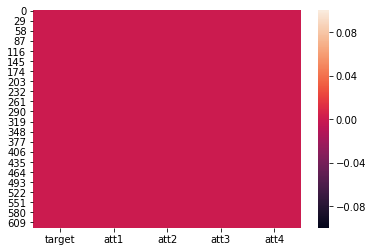

In [6]:
sns.heatmap(df.isnull())

dataset doesnt contain null value

In [7]:
#datatypes
df.dtypes

target    object
att1       int64
att2       int64
att3       int64
att4       int64
dtype: object

In [8]:
# description
df.describe()

,att1,att2,att3,att4
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


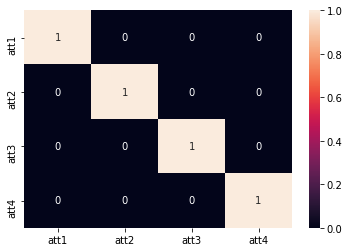

In [9]:
#corr
sns.heatmap(df.corr(),annot=True)

In [10]:
#lets analize data
df['target'].value_counts()

L    288
R    288
B     49
Name: target, dtype: int64

In [11]:
df['att1'].value_counts()

5    125
4    125
3    125
2    125
1    125
Name: att1, dtype: int64

In [12]:
df['att2'].value_counts()

5    125
4    125
3    125
2    125
1    125
Name: att2, dtype: int64

In [13]:
df['att3'].value_counts()

5    125
4    125
3    125
2    125
1    125
Name: att3, dtype: int64

In [14]:
df['att4'].value_counts()

5    125
4    125
3    125
2    125
1    125
Name: att4, dtype: int64

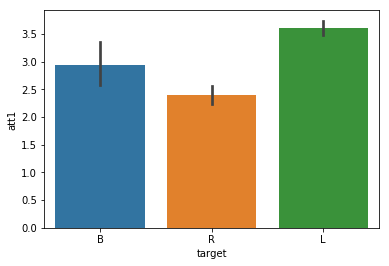

In [15]:
sns.barplot(x='target',y='att1',data=df)

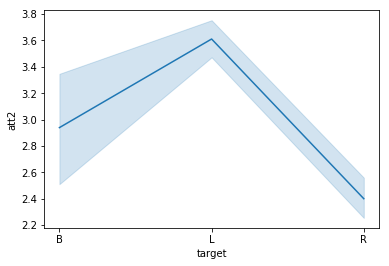

In [16]:
sns.lineplot(x='target',y='att2',data=df)

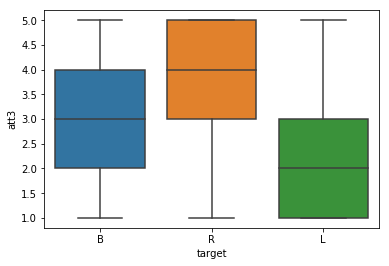

In [17]:
sns.boxplot(x='target',y='att3',data=df)

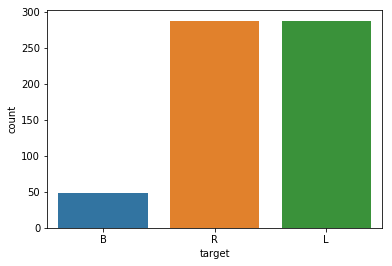

In [18]:
sns.countplot('target',data=df)

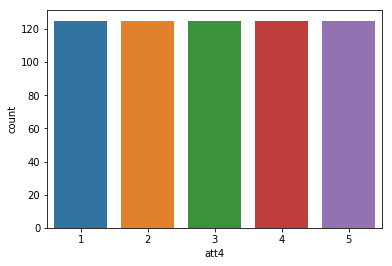

In [19]:
sns.countplot(x='att4',data=df)

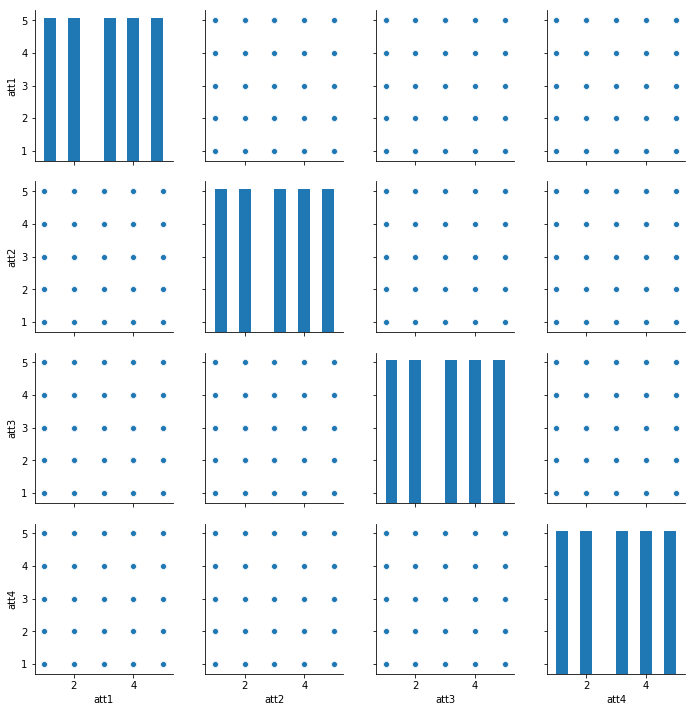

In [20]:
sns.pairplot(df)

In [21]:
#build model
x=df.iloc[:,1:5]
y=df['target']

In [22]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,

In [23]:
df['target'].value_counts()

L    288
R    288
B     49
Name: target, dtype: int64

In [24]:
#its imbalance dataset need to be treated
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.10,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred,average='macro')
        ("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

C:\Users\CG-DTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [25]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    print("Mean roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").mean())
    print("standard deviation in roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").std())
    print(cross_val_score(model,x,y,cv=10,scoring="roc_auc"))

### KNeighborsClassifier

In [26]:
#lets chcek KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=10,scoring="roc_auc")
y1 = label_binarize(y, classes=[0, 1, 2])
clf.fit(x,y1)
clf.best_params_

{'n_neighbors': 26}

In [27]:
kc=KNeighborsClassifier(n_neighbors=26)
print(max_aucroc_score(kc,x,y1))
#Lets chcek the cross val score
#lets print the scores for KNN classifier
print("KNN CLASSIFIER\n\n")
model_evaluation(kc,x,y1)

max auc roc score corresponding to  96  is  0.8402298850574713
96
KNN CLASSIFIER


Mean roc auc score for classifier:  0.9352364143189726
standard deviation in roc auc score for classifier:  0.03323097733847319
[0.93977579 0.89166483 0.9304214  0.93810385 0.96876469 0.97640648
 0.9269958  0.97701149 0.8684526  0.93476721]


## decision tree

In [28]:
#Lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,x,y1)
print(model_evaluation(kc,x,y1))

max auc roc score corresponding to  96  is  0.954868154158215
Mean roc auc score for classifier:  0.9352364143189726
standard deviation in roc auc score for classifier:  0.03323097733847319
[0.93977579 0.89166483 0.9304214  0.93810385 0.96876469 0.97640648
 0.9269958  0.97701149 0.8684526  0.93476721]
None


## RandomForestClassifier

In [29]:
#Lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=10,scoring="roc_auc")
clf.fit(x,y1)
clf.best_params_

{'n_estimators': 100}

In [30]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,x,y1)
#lets chcek the cross_val score
#Lets print the scores of Random forest
print("Random forest CLASSIFIER\n\n")
model_evaluation(rf_clf,x,y1)

max auc roc score corresponding to  51  is  0.8956727518593643
Random forest CLASSIFIER


Mean roc auc score for classifier:  0.8866339431271795
standard deviation in roc auc score for classifier:  0.029081525781645568
[0.899886   0.81808037 0.86099394 0.85672445 0.87021182 0.89143066
 0.8651669  0.8891498  0.90439944 0.93825911]


In [31]:
#we will use random forest as a final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 91,test_size=0.10,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf=RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
y_test = label_binarize(y_test, classes=[0, 1, 2])
y_pred = label_binarize(y_pred, classes=[0, 1, 2])
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[ 3  1  1]
 [ 2 27  0]
 [ 4  0 25]]
classification report 
               precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.96      0.93      0.95        29
           2       0.96      0.86      0.91        29

    accuracy                           0.87        63
   macro avg       0.75      0.80      0.76        63
weighted avg       0.91      0.87      0.89        63

AUC ROC Score:  0.8718052738336715


In [37]:
df = pd.DataFrame({'Actual': y_test[0], 'Predicted': y_pred[0]})
df.head()

,Actual,Predicted
0,0,0
1,0,0
2,1,1


In [39]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(rf_clf, 'balance_scale.joblib') 


['balance_scale.joblib']